In [1]:
import matplotlib as mpl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from tqdm import tqdm
from scipy.optimize import curve_fit

In [2]:
df = pd.read_csv('C:/Users/chenj/Desktop/AION/2023/Loading Rate/Repump/repump load-0002.csv',skiprows=[1])

In [3]:
df.iloc[:,1] = df.iloc[:,1]+30
df.iloc[:,0] = df.iloc[:,0] *1000

In [4]:
df = df[df.iloc[:,0]  >= 1050]

df = df[df.iloc[:,0]  <= 1600]

In [5]:
x= df.iloc[:,0] 

y = df.iloc[:,1]

In [8]:
#Quantifying photodiode signals into atom number

P_v = y*10**(-3) # V

V_err = 3 * 10**(-3)

P_r = 680*10**(3) # ohm



R_err = 125 

Respons = 0.15

Respons_err = 0.005



c = 299792458 #m/s

h = 6.62607015*10**(-34)# Joule*second

wavelength = 460.862022*10**(-9)

wave_err = 0.000002*10**(-9)

f = c/wavelength# m/s


E = h*f 


P_I = P_v/P_r #PD Current

P_P = P_I/Respons # Light incident power

r_p=P_P/E # photons per second/photon flux

gamma = 2*np.pi*30.41*10**(6) #The natural linewidth of the transition

I_Isat = 0.9

detune = -60 *10**(6) #Hz detuning of the 3D MOT beam
detune_err = 3 * 10**(6)

R = gamma/2*I_Isat/(1+I_Isat+4*detune**2/gamma**2)


N_pd = r_p/R # the number of atoms into the photodiode


#calculate the solid angle
r = 12.7*10**(-3)/2
r_err = 0.1*10**(-3)/2# mm
r_sqre = (12.7*10**(-3)/2)**2

A = np.pi*r_sqre

d = 0.15
d_err=0.001
d_sqre = d**2

Omega = A/d**2

N_r = N_pd*4*np.pi/Omega

y_new = N_r

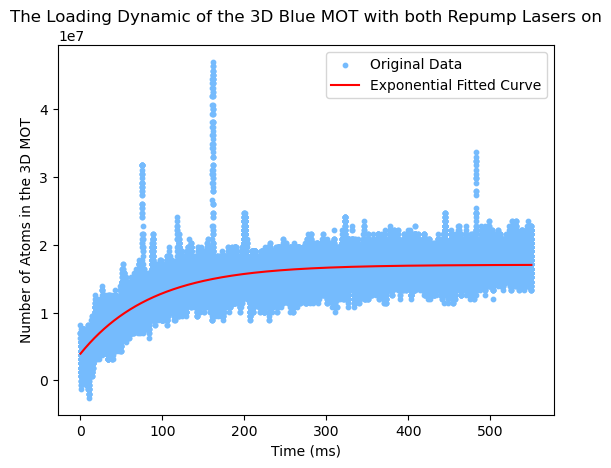

In [9]:
threshold = 1050

# Use boolean indexing to filter values
filtered_indices = x >= threshold
filtered_x = x[filtered_indices]-1050
filtered_y = y_new[filtered_indices]

def exponential_decay(x, a, b, c):
    return a * (1-np.exp(-b * x)) + c

p0=[1.31245103*10**7, 1.132006444*10**(-2), 3.95469870*10**6]

params, covariance = curve_fit(exponential_decay,filtered_x , filtered_y,p0, maxfev=8000)

a_opt, b_opt, c_opt = params

y_fit = exponential_decay(filtered_x, a_opt, b_opt, c_opt)

plt.scatter(filtered_x, filtered_y, s=10,color = "xkcd:sky blue",label='Original Data')

plt.plot(filtered_x, y_fit, label='Exponential Fitted Curve', color='red')

plt.xlabel('Time (ms)')
plt.ylabel("Number of Atoms in the 3D MOT")
plt.title('The Loading Dynamic of the 3D Blue MOT with both Repump Lasers on')
plt.legend()

# Show the plot
plt.show()